In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import plotly.express as px
import pandas as pd

In [2]:
# Function to calculate centroid of a polygon
def calculate_centroid(coords):
    x = [p[0] for p in coords]
    y = [p[1] for p in coords]
    centroid_x = sum(x) / len(coords)
    centroid_y = sum(y) / len(coords)
    return [centroid_y, centroid_x]

In [3]:
# Read the GeoJSON file
geojson_file_path = 'Resources/neighbourhoods.geojson'  
with open(geojson_file_path) as f:
    geojson_data = json.load(f)

In [4]:
# Read the CSV file
csv_file_path = 'Resources/updated_summarylist.csv'
airbnb_data = pd.read_csv(csv_file_path)

#Extract necessary columns from the CSV
airbnb_data = airbnb_data[['latitude', 'longitude', 'name','neighbourhood', 'room_type', 'price']]

In [5]:
# Step 4: Extract polygons and properties from GeoJSON
features = geojson_data['features']

polygons = []
neighborhood_names = []

for feature in features:
    geometry_type = feature['geometry']['type']
    neighborhood = feature['properties'].get('neighbourhood', 'Unknown')
    
    if geometry_type == 'MultiPolygon':
        for polygon in feature['geometry']['coordinates']:
            # Flatten the polygon coordinates
            flat_polygon = []
            for coord in polygon[0]:
                flat_polygon.append(coord)
            
            polygons.append(flat_polygon)
            neighborhood_names.append(neighborhood)

In [6]:
# Convert to DataFrame for Plotly
neighborhood_df = pd.DataFrame({
    'polygon': polygons,
    'neighborhood': neighborhood_names
})

In [7]:
# Create Plotly figure with GeoJSON
fig = px.choropleth_mapbox(
    neighborhood_df,
    geojson=geojson_data,
    locations='neighborhood',
    featureidkey="properties.neighbourhood",
    color='neighborhood',
    center={"lat": 35.6895, "lon": 139.6917},
    mapbox_style="carto-positron",
    zoom=10,
    opacity=0.5
)

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("Resources/choropleth_map.html")

In [8]:
airbnb_data['room_type'].value_counts()

room_type
Entire home/apt    6299
Private room       1506
Shared room         176
Hotel room          132
Name: count, dtype: int64

In [9]:
airbnb_home = airbnb_data[airbnb_data['room_type']=='Entire home/apt']
airbnb_private = airbnb_data[airbnb_data['room_type']=='Private room']
airbnb_shared = airbnb_data[airbnb_data['room_type']=='Shared room']
airbnb_hotel = airbnb_data[airbnb_data['room_type']=='Hotel room']
airbnb_home.head()

,latitude,longitude,name,neighbourhood,room_type,price
0,35.71707,139.82608,Rental unit in Sumida,Sumida Ku,Entire home/apt,11000
2,35.68374,139.85971,Rental unit in Edogawa,Edogawa Ku,Entire home/apt,7847
3,35.67878,139.67847,Rental unit in Shibuya,Shibuya Ku,Entire home/apt,23066
4,35.72672,139.78201,Rental unit in Arakawa-ku,Arakawa Ku,Entire home/apt,2871
6,35.58911,139.48023,Rental unit in Machida,Machida Shi,Entire home/apt,4814


In [21]:
# Making the text for hoverinfo
airbnb_home['text'] = airbnb_home.apply(
    lambda row: f"Name: {row['name']}<br>Neighbourhood: {row['neighbourhood']}<br>Price: ¥{row['price']}", axis=1)
airbnb_private['text'] = airbnb_private.apply(
    lambda row: f"Name: {row['name']}<br>Neighbourhood: {row['neighbourhood']}<br>Price: ¥{row['price']}", axis=1)
airbnb_shared['text'] = airbnb_shared.apply(
    lambda row: f"Name: {row['name']}<br>Neighbourhood: {row['neighbourhood']}<br>Price: ¥{row['price']}", axis=1)
airbnb_hotel['text'] = airbnb_hotel.apply(
    lambda row: f"Name: {row['name']}<br>Neighbourhood: {row['neighbourhood']}<br>Price: ¥{row['price']}", axis=1)

C:\Users\mmm\AppData\Local\Temp\ipykernel_4864\816053198.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mmm\AppData\Local\Temp\ipykernel_4864\816053198.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mmm\AppData\Local\Temp\ipykernel_4864\816053198.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [22]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create traces for the dropdown
home = go.Scattermapbox(
    lat=airbnb_home['latitude'],
    lon=airbnb_home['longitude'],
    mode='markers',
    marker=dict(size=10, color='blue'),
    text=airbnb_home['text'],
    hoverinfo='text',
    name='Entire Homes',
)
private = go.Scattermapbox(
    lat=airbnb_private['latitude'],
    lon=airbnb_private['longitude'],
    mode='markers',
    marker=dict(size=10, color='green'),
    text=airbnb_private['text'],
    hoverinfo='text',
    name='Private Rooms',
)
shared = go.Scattermapbox(
    lat=airbnb_shared['latitude'],
    lon=airbnb_shared['longitude'],
    mode='markers',
    marker=dict(size=10, color='red'),
    text=airbnb_shared['text'],
    hoverinfo='text',
    name='Shared Rooms',
)
hotel = go.Scattermapbox(
    lat=airbnb_hotel['latitude'],
    lon=airbnb_hotel['longitude'],
    mode='markers',
    marker=dict(size=10, color='yellow'),
    text=airbnb_hotel['text'],
    hoverinfo='text',
    name='Hotel Rooms',
)

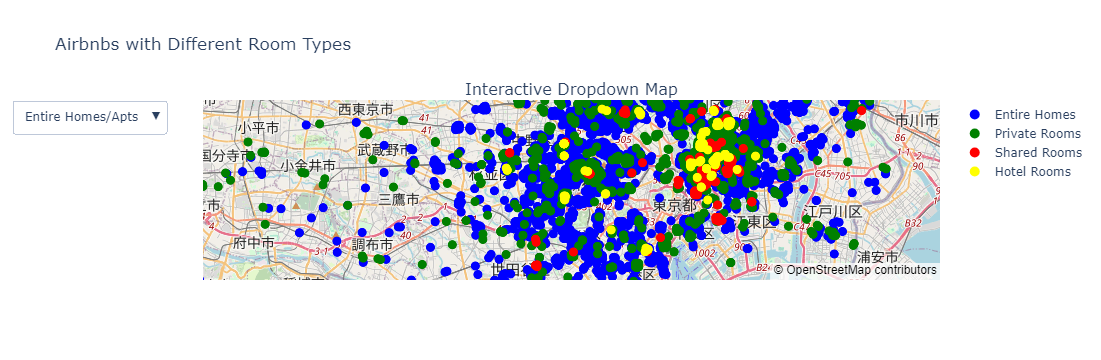

In [23]:
# Create layout with dropdown
layout = go.Layout(
    title='Airbnbs with Different Room Types',
    mapbox=dict(
        style='open-street-map',
        zoom=10,
        center=dict(lat=35.6895, lon=139.6917)
    ),
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'Entire Homes/Apts',
                    'method': 'update',
                    'args': [{'visible': [True, False, False, False]}, {'title': 'Entire Homes'}]
                },
                {
                    'label': 'Private Rooms',
                    'method': 'update',
                    'args': [{'visible': [False, True, False, False]}, {'title': 'Private Rooms'}]
                },
                {
                    'label': 'Shared Rooms',
                    'method': 'update',
                    'args': [{'visible': [False, False, True, False]}, {'title': 'Shared Rooms'}]
                },
                {
                    'label': 'Hotel Rooms',
                    'method': 'update',
                    'args': [{'visible': [False, False, False, True]}, {'title': 'Hotel Rooms'}]
                },
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Create figure
ddMap = make_subplots(rows=1, cols=1, subplot_titles=('Interactive Dropdown Map',))
ddMap.add_trace(home)
ddMap.add_trace(private)
ddMap.add_trace(shared)
ddMap.add_trace(hotel)
ddMap.update_layout(layout)
ddMap.show()

In [24]:
# Save to HTML files
import plotly.offline as pyo
import os
output_file_path = os.path.join('Resources', 'interactiveMap_byRoomtype-update.html')
pyo.plot(ddMap, filename=output_file_path)

'Resources\\interactiveMap_byRoomtype-update.html'